# Individual Playlist Investigations

Prepare frame for processing

In [8]:
playlist_name = "ALL RAP"
playlist = get_playlist(playlist_name, spotnet)
playlist_frame = pd.merge(track_frame(playlist.tracks), scrobbles, on=['track', 'artist']) # FILTER SCROBBLES
playlist_frame = playlist_frame.sort_index(ascending=False) # SORT
playlist_frame = playlist_frame.loc[:, spotify_descriptor_headers] # DESCRIPTORS

total_time = playlist_frame["duration_ms"].sum() / (1000 * 60) # minutes
total_days = total_time / (60 * 24) # days
print(f'{playlist_frame.count()[0]:,d} scrobbles')
print(f'{total_days:.0f} days spent listening since Nov. 2017')
print(f'{total_time / days_since(first_day).days:.2f} minutes/day')

playlist_frame.describe()[1:]

12,455 scrobbles
32 days spent listening since Nov. 2017
38.61 minutes/day


,duration_ms,mode,loudness,key,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
mean,220576.782577,0.640947,-6.733367,5.385548,119.263638,4.008511,0.178874,0.660686,0.710924,0.007824,0.246660,0.276648,0.480153
std,61942.238445,0.479742,2.420944,3.747218,31.763759,0.244269,0.184188,0.149962,0.143197,0.053548,0.171092,0.127003,0.223495
min,60867.000000,0.000000,-17.819000,0.000000,61.113000,1.000000,0.000017,0.261000,0.252000,0.000000,0.033300,0.032300,0.027200
25%,183380.000000,0.000000,-8.320000,1.000000,91.973000,4.000000,0.035000,0.548000,0.604000,0.000000,0.114000,0.190000,0.313000
50%,210076.000000,1.000000,-6.533000,6.000000,117.267000,4.000000,0.121000,0.672000,0.720000,0.000000,0.186000,0.282000,0.475000
75%,253467.000000,1.000000,-5.089000,9.000000,140.065000,4.000000,0.254000,0.766000,0.822000,0.000035,0.339000,0.362000,0.641000
max,774920.000000,1.000000,-0.140000,11.000000,207.982000,5.000000,0.864000,0.975000,0.993000,0.847000,0.979000,0.827000,0.962000


Count of played songs from playlist over time, grouped by month

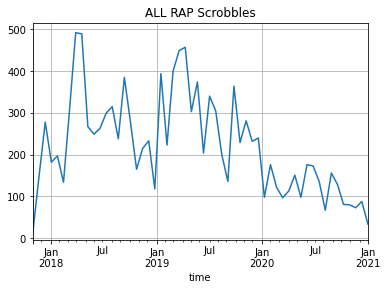

In [9]:
# filter playlists by join with playlist track/artist names
filtered_playlist = pd.merge(track_frame(playlist.tracks), scrobbles.reset_index(), on=['track', 'artist'])
# to time series, select only descriptor float columns
filtered_playlist = filtered_playlist.set_index('time').loc[:, ["energy"]]
# resample by day and mean
filtered_playlist = filtered_playlist.resample("3W").count()

filtered_playlist["energy"].plot()

plt.title(f"{playlist_name} Scrobbles")
plt.grid()
plt.show()

Plot change in descriptor characteristics over time

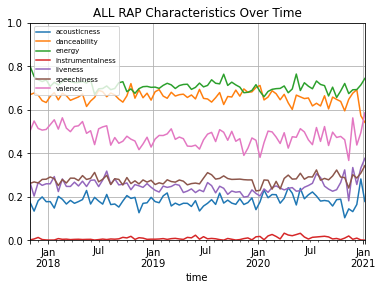

In [11]:
# filter playlists by join with playlist track/artist names
filtered_playlist = pd.merge(track_frame(playlist.tracks), scrobbles.reset_index(), on=['track', 'artist'])
# to time series
filtered_playlist = filtered_playlist.set_index('time')
# select only descriptor float columns
filtered_playlist = filtered_playlist.loc[:, float_headers]
# resample by day and mean
filtered_playlist = filtered_playlist.resample("2W").mean()

# filtered_playlist["energy"].plot()
filtered_playlist.plot()

plt.title(f"{playlist_name} Characteristics Over Time")
plt.legend(loc = "upper left", fontsize = "x-small")
plt.ylim([0, 1])
plt.grid()
plt.show()

# Playlist Comparisons

Take the average descriptor for a handful of playlists and comapre the results

In [5]:
playlist_names = ["RAP", "EDM", "ROCK", "METAL", "JAZZ", "POP"]
playlists = [get_playlist(i, spotnet) for i in playlist_names]

# filter playlists by join with playlist track/artist names
filtered_playlists = [pd.merge(track_frame(i.tracks), scrobbles, on=['track', 'artist']) for i in playlists]

playlist_counts = [i.count()[0] for i in filtered_playlists]
playlist_time = [i["duration_ms"].sum() for i in filtered_playlists]

# distinct on uri
filtered_playlists = [i.drop_duplicates(['uri']) for i in filtered_playlists]
# select only descriptor float columns
filtered_playlists = [i.loc[:, float_headers] for i in filtered_playlists]

playlist_mean = [i.mean() for i in filtered_playlists]
playlist_std = [i.std() for i in filtered_playlists]

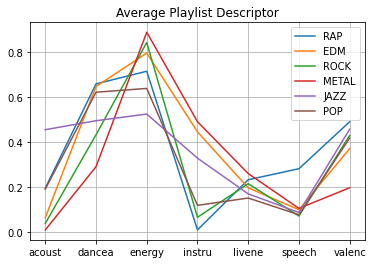

In [6]:
x_pos = [i for i, _ in enumerate(float_headers)]
for mean in playlist_mean:
    plt.plot(x_pos, mean)
    
plt.legend(playlist_names)
plt.xticks(x_pos, [i[:6] for i in float_headers])
plt.title('Average Playlist Descriptor')
plt.grid()
plt.show()

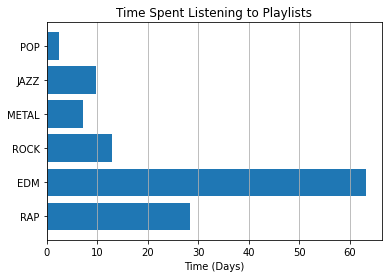

In [7]:
plt.barh(np.arange(len(playlist_names)), np.array(playlist_time) / (1000 * 60 * 60 * 24) )
plt.yticks(np.arange(len(playlist_names)), labels=playlist_names)
plt.xlabel("Time (Days)")
plt.grid(axis="x")
plt.title("Time Spent Listening to Playlists")
plt.show()

# Imports & Setup

In [1]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_playlist, track_frame
from analysis.query import *
from analysis import spotify_descriptor_headers, float_headers, days_since

import numpy as np
import pandas as pd

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [4]:
scrobbles = get_query()

## Write Scrobble Frame

In [ ]:
scrobbles.to_csv(cache, sep='\t')